In [8]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.1.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\users\kiro\appdata\local\packages\pythonsoftwarefoundation.python.3.10_qbz5n2kfra8p0\localcache\local-packages\python310\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: sklearn


In [7]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [9]:
# import dataset
loan_train = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
loan_test = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')

In [10]:
loam_train_cc=loan_train

In [11]:
loan_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
loan_test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [13]:
loan_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [14]:
loan_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [15]:
print(f"number of training samples : {len(loan_train)} , number of test samples : {len(loan_test)}")

number of training samples : 614 , number of test samples : 367


In [16]:
# Check for missing data
loan_train.isna().values.any(),loan_test.isna().values.any()

(True, True)

In [17]:
print("Missings in training dataset : \n")
print(loan_train.isna().sum())

print("\nMissings in test dataset : \n")
print(loan_test.isna().sum())

Missings in training dataset : 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Missings in test dataset : 

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [18]:
# Data Cleaning & Preparation

In [19]:
# credit history before fillling missing data
display(loan_train['Credit_History'].to_string())

'0      1.0\n1      1.0\n2      1.0\n3      1.0\n4      1.0\n5      1.0\n6      1.0\n7      0.0\n8      1.0\n9      1.0\n10     1.0\n11     1.0\n12     1.0\n13     1.0\n14     1.0\n15     1.0\n16     NaN\n17     0.0\n18     1.0\n19     1.0\n20     0.0\n21     1.0\n22     0.0\n23     0.0\n24     NaN\n25     1.0\n26     1.0\n27     1.0\n28     1.0\n29     1.0\n30     NaN\n31     1.0\n32     1.0\n33     1.0\n34     1.0\n35     1.0\n36     0.0\n37     1.0\n38     1.0\n39     1.0\n40     1.0\n41     1.0\n42     NaN\n43     1.0\n44     1.0\n45     1.0\n46     1.0\n47     1.0\n48     0.0\n49     1.0\n50     1.0\n51     1.0\n52     1.0\n53     1.0\n54     0.0\n55     1.0\n56     1.0\n57     1.0\n58     1.0\n59     1.0\n60     1.0\n61     1.0\n62     0.0\n63     0.0\n64     0.0\n65     1.0\n66     0.0\n67     1.0\n68     1.0\n69     0.0\n70     1.0\n71     1.0\n72     1.0\n73     0.0\n74     1.0\n75     1.0\n76     1.0\n77     1.0\n78     0.0\n79     NaN\n80     1.0\n81     1.0\n82     1.0\n83 

In [20]:
# fill binary Credit_History column with (mode) most frequent value
imp_cat=SimpleImputer(strategy="most_frequent")
credit_reshaped=loan_train['Credit_History'].values.reshape(-1,1)
credit_reshaped=imp_cat.fit_transform(credit_reshaped)
loan_train['Credit_History'] = credit_reshaped

In [21]:
# credit history after fillling with mode
display(loan_train['Credit_History'].to_string())

'0      1.0\n1      1.0\n2      1.0\n3      1.0\n4      1.0\n5      1.0\n6      1.0\n7      0.0\n8      1.0\n9      1.0\n10     1.0\n11     1.0\n12     1.0\n13     1.0\n14     1.0\n15     1.0\n16     1.0\n17     0.0\n18     1.0\n19     1.0\n20     0.0\n21     1.0\n22     0.0\n23     0.0\n24     1.0\n25     1.0\n26     1.0\n27     1.0\n28     1.0\n29     1.0\n30     1.0\n31     1.0\n32     1.0\n33     1.0\n34     1.0\n35     1.0\n36     0.0\n37     1.0\n38     1.0\n39     1.0\n40     1.0\n41     1.0\n42     1.0\n43     1.0\n44     1.0\n45     1.0\n46     1.0\n47     1.0\n48     0.0\n49     1.0\n50     1.0\n51     1.0\n52     1.0\n53     1.0\n54     0.0\n55     1.0\n56     1.0\n57     1.0\n58     1.0\n59     1.0\n60     1.0\n61     1.0\n62     0.0\n63     0.0\n64     0.0\n65     1.0\n66     0.0\n67     1.0\n68     1.0\n69     0.0\n70     1.0\n71     1.0\n72     1.0\n73     0.0\n74     1.0\n75     1.0\n76     1.0\n77     1.0\n78     0.0\n79     1.0\n80     1.0\n81     1.0\n82     1.0\n83 

In [22]:
print(loan_train.isna().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64


In [23]:
# another way to fill "forward or backward fill" (every nan value takes the last sample value before him (forward))
# loan_train['Credit_History'].fillna(method='ffill', inplace=True) # use bfill for backward filling

In [24]:
# check for any missing values
loan_train['Credit_History'].isna().values.any()

False

In [25]:
# we will fill loan_amount and loan_amount_term with median there is 2 ways we will use both (same result)
median_loan=loan_train['Loan_Amount_Term'].median()
print("Median = "+str(median_loan))
print("Mean = "+str(loan_train['Loan_Amount_Term'].mean()))
# better fit median
loan_train['Loan_Amount_Term'].fillna((median_loan), inplace=True)
# the other method with simple imputer ( the default of the simple imputer is the mean not the median YOu have to change the stratygy)
loan_train['Loan_Amount_Term'].isna().values.any()

Median = 360.0
Mean = 342.0


False

In [26]:
print("Median = "+str(loan_train['LoanAmount'].median()))
print("Mean = "+str(loan_train['LoanAmount'].mean()))
# fit median better (I tried mean it get lower accuarcy)
median_loan_amount = int(loan_train['LoanAmount'].median()) # fill int value
loan_train['LoanAmount'].fillna((median_loan_amount), inplace=True)
loan_train['LoanAmount'].isna().values.any()

Median = 128.0
Mean = 146.41216216216216


False

In [27]:
# Count the values to know which occurs most frequently
loan_train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [28]:
#Fill with mode
loan_train['Self_Employed'].fillna('No', inplace=True)
loan_train['Self_Employed'].isna().values.any()

False

In [29]:
# Count the values to know which occurs most frequently
loan_train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [30]:
loan_train['Dependents'].fillna(0, inplace=True)
loan_train['Dependents'].isna().values.any()

False

In [31]:
# Count the values to know which occurs most frequently
loan_train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [32]:
print(loan_train['Married'].mode()) # another way to get mode (most frequent)
loan_train['Married'].fillna('Yes', inplace=True)
loan_train['Married'].isna().values.any()

0    Yes
Name: Married, dtype: object


False

In [33]:
# get mode (most frequent)
print(loan_train['Gender'].mode())
loan_train['Gender'].fillna('Male', inplace=True)
loan_train['Gender'].isna().values.any()

0    Male
Name: Gender, dtype: object


False

In [34]:
loan_train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [35]:
loan_test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [36]:
# do the same with test set
loan_test['Credit_History'].fillna(method='ffill', inplace=True)

median_loan_test = loan_test['Loan_Amount_Term'].median()
loan_test['Loan_Amount_Term'].fillna((median_loan_test), inplace=True)

mean_loan_amount_test = loan_test['LoanAmount'].mean()
loan_test['LoanAmount'].fillna((mean_loan_amount_test), inplace=True)

loan_test['Self_Employed'].fillna('No', inplace=True)

loan_test['Dependents'].fillna(0, inplace=True)

loan_test['Gender'].fillna('Male', inplace=True)
loan_test.isna().values.any()

False

In [37]:
loan_test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [38]:
# Check duplications
print(loan_train.duplicated().values.any())
print(loan_test.duplicated().values.any())

False
False


In [39]:
# Data Visualization & Exploratory Analysis
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [40]:
categorical_columns = loam_train_cc.select_dtypes('object').columns.to_list()
# we do analisys and visualization on data set before cleaning

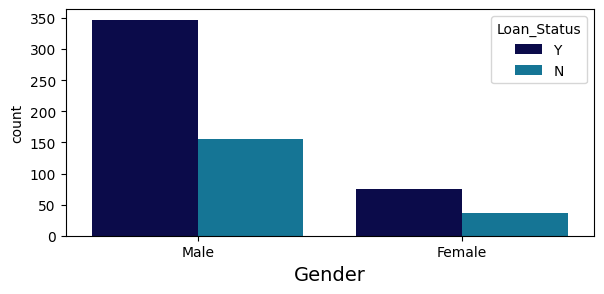

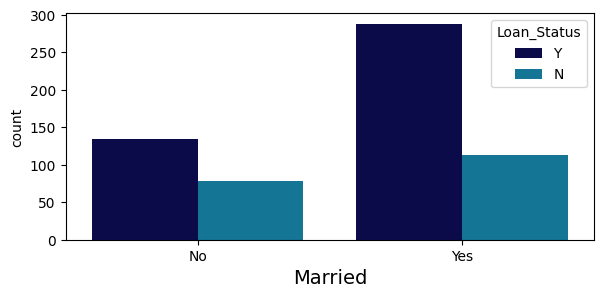

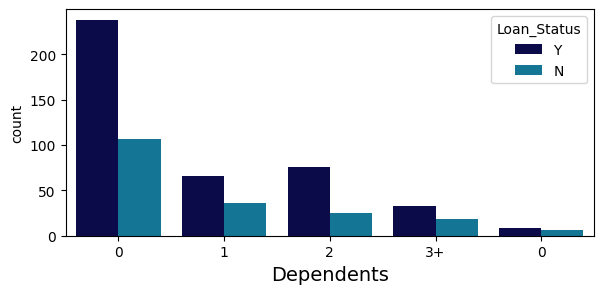

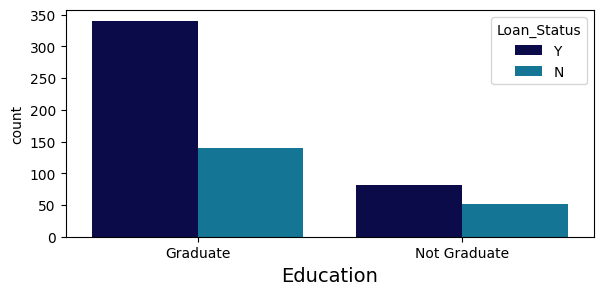

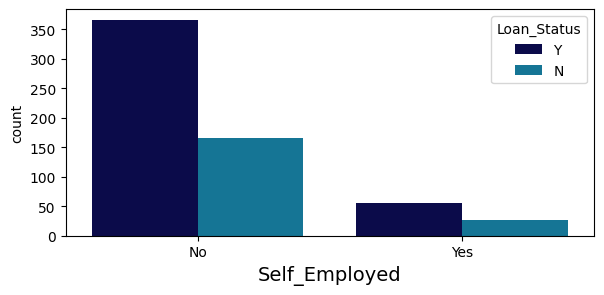

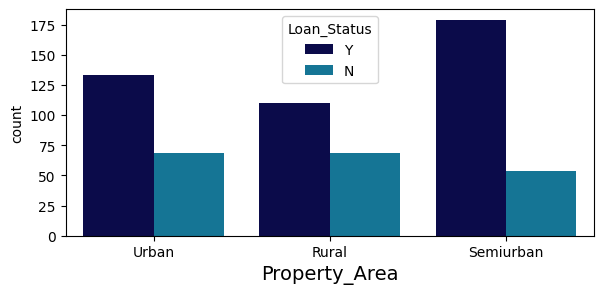

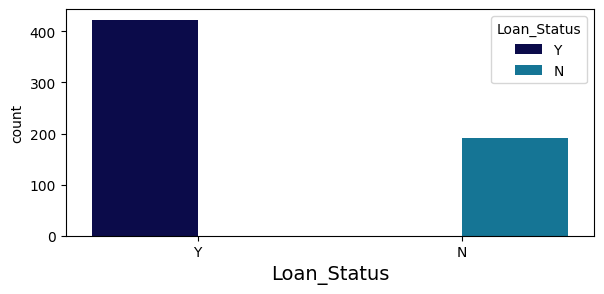

In [41]:
for i in categorical_columns[1:]: 
    plt.figure(figsize=(15,10))
    plt.subplot(3,2,1)
    sns.countplot(x=i ,hue='Loan_Status', data=loam_train_cc, palette='ocean')
    plt.xlabel(i, fontsize=14)

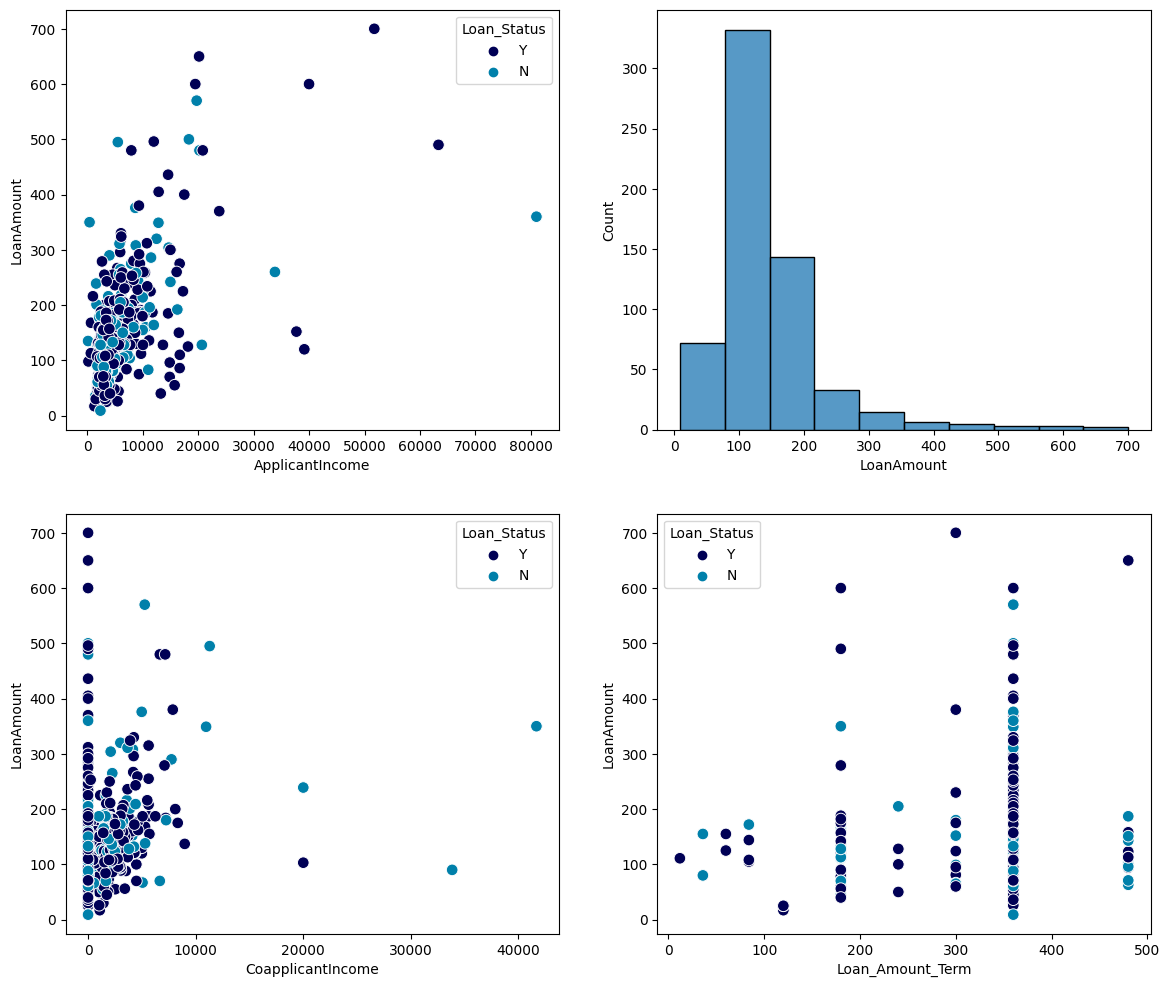

In [42]:
fig, ax = plt.subplots(2,2, figsize=(14,12))

sns.scatterplot(data=loan_train,x="ApplicantIncome", y="LoanAmount",s=70, hue="Loan_Status", palette='ocean',ax=ax[0,0])
sns.histplot(loan_train, x=loan_train['LoanAmount'], bins=10, ax=ax[0,1])
sns.scatterplot(data=loan_train,x='CoapplicantIncome', y='LoanAmount',s=70, hue='Loan_Status',palette='ocean', ax=ax[1,0])
sns.scatterplot(data=loan_train,x='Loan_Amount_Term', y='LoanAmount', s=70, hue='Loan_Status',palette='ocean', ax=ax[1,1])

plt.show()

In [43]:
loan_train.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.011134
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.000607
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.000607,-0.004705,1.000000


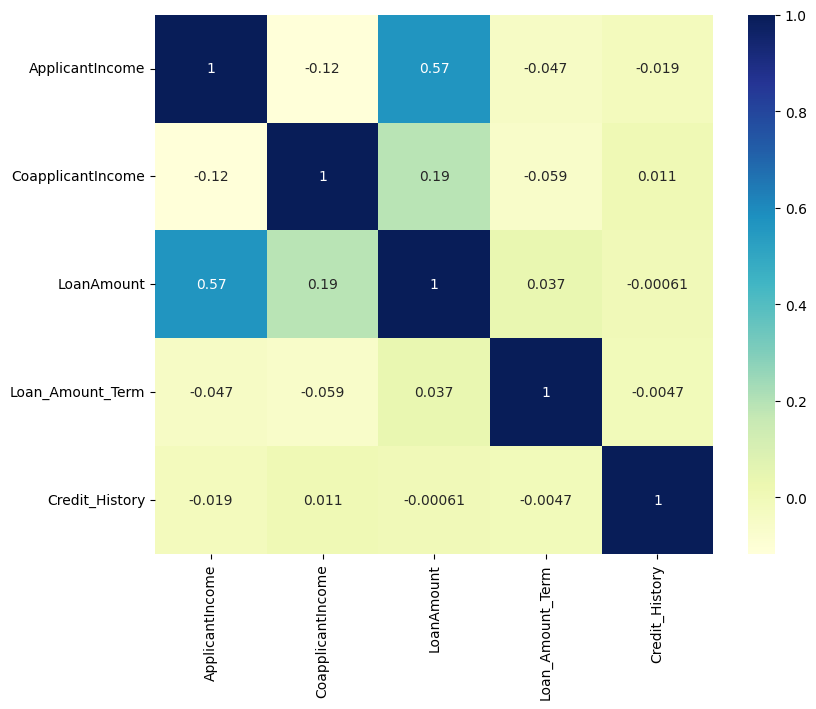

In [44]:
# Let's get a more high level view of the correlations between numeric variables
fig, ax = plt.subplots(figsize=(9, 7))
correlations = loan_train.corr()
  
dataplot = sns.heatmap(correlations, cmap="YlGnBu", annot=True)
  
plt.show()

In [45]:
# Pre processing
# transform all sample to numerical values
print (loan_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [46]:
objectlist_train = loan_train.select_dtypes(include = "object").columns

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feature in objectlist_train:
    loan_train[feature] = le.fit_transform(loan_train[feature].astype(str))

print (loan_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    int32  
 1   Gender             614 non-null    int32  
 2   Married            614 non-null    int32  
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    int32  
 5   Self_Employed      614 non-null    int32  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int32  
 12  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(8), int64(1)
memory usage: 43.3 KB
None


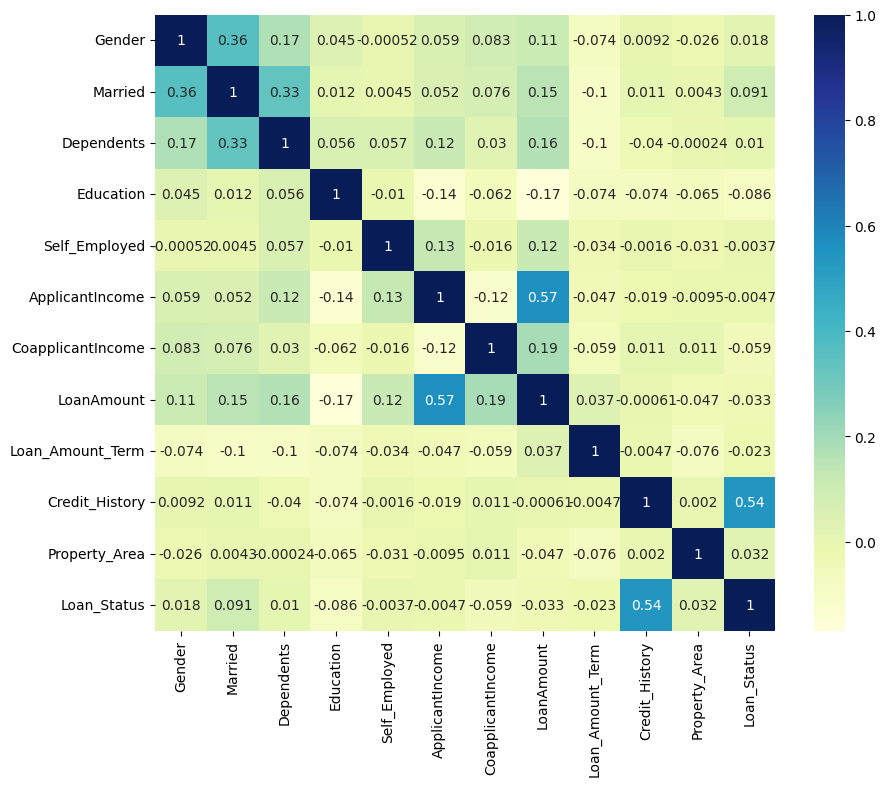

In [47]:
fig, ax = plt.subplots(figsize=(10, 8))
correlations_ML = loan_train.iloc[:,1:].corr() # filer out the Loan_ID column as it is not relevant
sns.heatmap(correlations_ML, cmap="YlGnBu", annot=True)
plt.show()
# we focus in correlation with loan status
# it seams like credit history got the strongest corelation

In [48]:
# Machine Learning Model
# preparing training
x = loan_train.iloc[:,1:].drop('Loan_Status', axis=1) # drop loan_status column because that is what we are predicting
y = loan_train['Loan_Status']
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.30, random_state=0)

In [49]:
# Decision Tree Classifier Model
df_model = DecisionTreeClassifier()
df_model.fit(train_x, train_y)
predict_y = df_model.predict(test_x)
print(classification_report(test_y, predict_y))
print("Accuracy:", accuracy_score(predict_y, test_y))

              precision    recall  f1-score   support

           0       0.50      0.55      0.52        51
           1       0.82      0.79      0.81       134

    accuracy                           0.72       185
   macro avg       0.66      0.67      0.66       185
weighted avg       0.73      0.72      0.73       185

Accuracy: 0.7243243243243244


In [50]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(train_x, train_y)
predict_y_2 = rf_model.predict(test_x)
print(classification_report(test_y, predict_y_2))
print("Accuracy:", accuracy_score(predict_y_2, test_y))

              precision    recall  f1-score   support

           0       0.79      0.45      0.58        51
           1       0.82      0.96      0.88       134

    accuracy                           0.82       185
   macro avg       0.81      0.70      0.73       185
weighted avg       0.81      0.82      0.80       185

Accuracy: 0.8162162162162162


In [51]:
# Logistic Regression Model
lr_model = LogisticRegression(solver='lbfgs', multi_class='auto')
lr_model.fit(train_x, train_y)
predict_y_3 = lr_model.predict(test_x)
print(classification_report(test_y, predict_y_3))
print("Accuracy:", accuracy_score(predict_y_3, test_y))

              precision    recall  f1-score   support

           0       0.88      0.43      0.58        51
           1       0.82      0.98      0.89       134

    accuracy                           0.83       185
   macro avg       0.85      0.70      0.74       185
weighted avg       0.84      0.83      0.81       185

Accuracy: 0.827027027027027


E:\programming\Artificial intelligence\Machine learning\scikit-learn projects\Loan prediction problem\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
# combine the 3 models together
zeros =0
ones =0
for i in range (len(predict_y)):
    if predict_y[i]==0:
        zeros+=1
    else:
        ones+=1
    if predict_y_2[i]==0:
        zeros+=1
    else:
        ones+=1
    if predict_y_3[i]==0:
        zeros+=1
    else:
        ones+=1
    if zeros>ones:
        predict_y[i]=0
    else:
        predict_y[i]=1
    zeros =0
    ones = 0
print("Accuracy:", accuracy_score(predict_y, test_y))
# logistic regression got the best accuarcy

Accuracy: 0.8216216216216217
